In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
delivery_db = pd.read_csv('delivery.csv')

In [3]:
delivery_db.describe()

,n.prod,distance,delTime
count,25.000000,25.000000,25.000000
mean,8.760000,409.280000,22.384000
std,6.881618,325.188089,15.524903
min,2.000000,36.000000,8.000000
25%,4.000000,150.000000,13.750000
50%,7.000000,330.000000,18.110000
75%,10.000000,605.000000,21.500000
max,30.000000,1460.000000,79.240000


In [4]:
delivery_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
n.prod      25 non-null int64
distance    25 non-null int64
delTime     25 non-null float64
dtypes: float64(1), int64(2)
memory usage: 680.0 bytes


# Ploting a pairplot

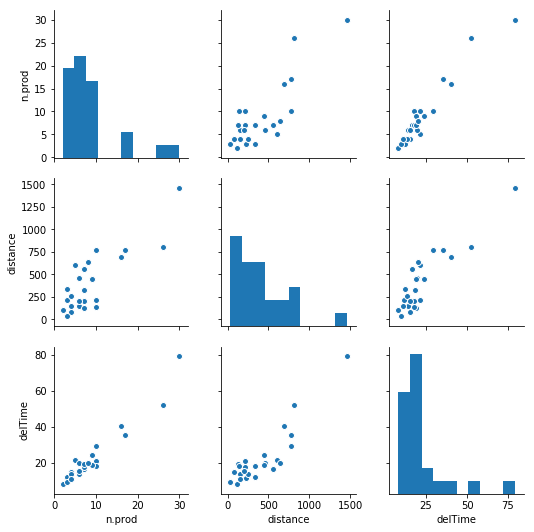

In [8]:
sns.pairplot(delivery_db)

# Building Multilinear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
X = delivery_db[['n.prod', 'distance']]
y = delivery_db['delTime']

In [11]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print('Coefficient: ', model.coef_, 'Intercept: ', model.intercept_)

Coefficient:  [1.61590721 0.01438483] Intercept:  2.3412311451922


In [13]:
model0 = model.intercept_ + model.coef_[0]*delivery_db['n.prod'] + model.coef_[1]*delivery_db['distance']x

# Visualizing the data

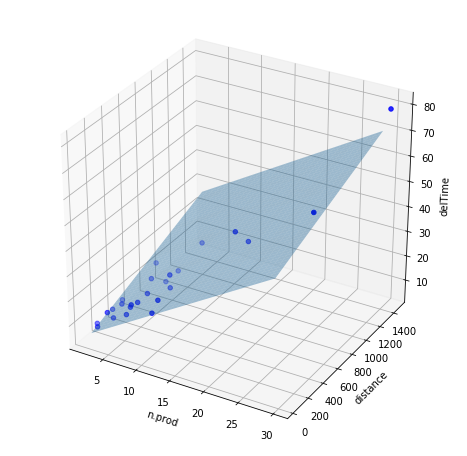

In [31]:
from mpl_toolkits.mplot3d import Axes3D # <--- 3d plotting 
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.scatter(xs = delivery_db["n.prod"], ys = delivery_db["distance"], zs=delivery_db["delTime"],
           c='blue')
ax.set_xlabel("n.prod")
ax.set_ylabel("distance")
ax.set_zlabel("delTime")

#Creating mesh to plot on regression plane
x_surf = np.arange(delivery_db['n.prod'].min(), delivery_db['n.prod'].max(), 1)
y_surf = np.arange(delivery_db['distance'].min(), delivery_db['distance'].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.DataFrame({'n.prod': x_surf.ravel(), 'distance': y_surf.ravel()})

# Predicting the output and plotting the regression plane
out = model.predict(X_mesh)
ax.plot_surface(x_surf, y_surf, out.reshape(x_surf.shape), alpha=0.4)

# Corelation between the variables (Multicollinearity and VIF)

In a multiple regression model where two or more predictor variables are involved, it is possible that one predictor can be linearly predicted from the others, with a substantial degree of accuracy. In such a situation, the predictors are said to be highly correlated. In statistics, this phenomenon is called multicollinearity, or in other words collinearity between variables (Definition from Wikipedia: Multicollinearity).

The variables are suggested to be linearly dependent if the correlation values are close to -1 or 1. 

In addition to correlation, there is another measure called variance inflation factor(VIF) to determine if the predictor variables are independent of each other.
V = 1/(1 - R**2)

The range of VIF values start from 1. As a common practice, VIF values can be interpreted as follows

1 => No correlation between variables

1 to 5 => Slightly correlated

Greater than 5 => Highly correlated

In [32]:
# finding the correlation
np.corrcoef(delivery_db["n.prod"],delivery_db["distance"])

array([[1.      , 0.824215],
       [0.824215, 1.      ]])

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.Series([variance_inflation_factor(X.values,idx) for idx in range(X.shape[1])],
               index=X.columns)
print('Variance Inflation Factor:\n', vif)

Variance Inflation Factor:
 n.prod      7.848245
distance    7.848245
dtype: float64


In [35]:
# Score
model.score(X, y)

0.9595937494832257

# Adjusted R-squared

The R2 value can be inflated by including more and more predictor variables.
The adjusted R2 takes into account the number of predictor variables and the number of samples or observations included in the Regression model.

R = 1 - ((SSE/(n-k-1)/(SST/(n-1)))

Where, n is the number of observations and k is the number of number of predictor variables in the model. 

In [37]:
X = delivery_db[['n.prod', 'distance']]
y = delivery_db['delTime']
adjusted_rscore = 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjusted_rscore)

0.9559204539817008
